   ## 로지스틱 회귀

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
BC = pd.DataFrame(cancer.data, columns=cancer.feature_names)
BC['mean radius'].mean()

14.127291739894563

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [4]:
BC_scaled = pd.DataFrame(data_scaled, columns=cancer.feature_names)
BC_scaled['mean radius'].mean()

-3.1628673513486446e-15

In [5]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr_clf = LogisticRegression(n_jobs=-1) # defalult: penalty='l2', C=1.0
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

# accuracy와 roc_auc 측정
print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.977
roc_auc: 0.972


In [6]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.02, 0.05, 0.1,0.3, 0.5, 0.8, 1,3, 5, 7, 10, 20]} # C = 1/alpha --> C가 클수록 alpha가 작아진다

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3, n_jobs=-1)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.3, 'penalty': 'l2'}, 최적 평균 정확도:0.977


In [7]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
grid_lr_pred = grid_clf.best_estimator_.predict(X_test)
grid_lr_accuracy = accuracy_score(y_test, grid_lr_pred)
print('logistic regression 정확도: {0:.4f}'.format(grid_lr_accuracy))

logistic regression 정확도: 0.9883


### _______

### 실습 0. 파라미터 튜닝에서 엘라스틱넷을 추가하고, l1, l2, 엘라스틱넷 규제를 모두 적용할 수 있는 solver를 찾아 변경하고, 최적의 결과를 찾은 후 다른 규제의 결과와 비교해 봅니다. (30 minutes)

### ___________

### 실습 1. Linear Regression을 사용하여 위스콘신 유방암 데이터를 분석하고 나온 결과값을 0.5 미만이면 0, 0.5이상이면 1로 변경하여 실제 분류 적중률을 계산하고, Logistic Regression에서 나온 값과 비교한 결과를 공유합니다. (1 hour)

### ____________________________________________________________________________________

### 실습 2. wine quality를 Logistic Regression으로 분석, 파라미터 튜닝해보시고 결과값을 공유해주세요 (30 minutes)

### ________________________________________________________

## 5.8 회귀 트리

### ___________

In [8]:
from sklearn.datasets import load_boston # 보스턴 주택 가격 데이터
from sklearn.model_selection import cross_val_score # K-fold 교차검증
from sklearn.ensemble import RandomForestRegressor # 랜덤포레스트 배깅 회귀모델
import pandas as pd # 표 관리 판다스
import numpy as np # 그룹 연산 넘파이

# 보스턴 데이터 세트 로드
boston = load_boston() # 보스턴 데이터셋 클래스 호출 및 변수 생성
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names) # 넘파이 자료를 표로 변환

bostonDF['PRICE'] = boston.target # 종속변수 및 데이터 생성
y_target = bostonDF['PRICE']  # 종속변수 데이터 y_target에 지정
X_data = bostonDF.drop(['PRICE'], axis=1,inplace=False) # 전체 데이터에서 종속변수를 제거한 독립변수 셋

rf = RandomForestRegressor(random_state=0, n_estimators=1000) # 랜덤포레스트회귀 클래스 호출 및 변수지정
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5) # 회귀교차검증
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # 낮은 값이 더 중요한 것을 알리기 위해 - 곱
avg_rmse = np.mean(rmse_scores) # 교차검증된 수량들의 평균 rmse 계산

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2)) # 소수점 2자리에서 각 mse 출력
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2)) # 소수점 2자리에서 각 rmse 출력
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse)) # 전체 평균 rmse 출력

 5 교차 검증의 개별 Negative MSE scores:  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores :  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.420 


In [9]:
def get_model_cv_prediction(model, X_data, y_target): # 인수에 ml 모델명, 독립변수모음. 종속변수 기입 
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5, n_jobs=-1) # ml 모델별 교차검증
    rmse_scores  = np.sqrt(-1 * neg_mse_scores) # 위에서 했던 negative mse 계산
    avg_rmse = np.mean(rmse_scores) # 교차검증 평균 rmse 계산
    print('##### ',model.__class__.__name__ , ' #####')
    print(' {1} 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse, model))

In [10]:
from sklearn.tree import DecisionTreeRegressor # 회귀의사결정나무 모델
from sklearn.ensemble import GradientBoostingRegressor # 부스팅-그라디언트부스팅회귀
from xgboost import XGBRegressor # 부스팅-XGBoost회귀
from lightgbm import LGBMRegressor # 부스팅-LightGBM 회귀

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4) # 회귀의사결정나무 모델 클래스 호출
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs=-1) # 랜덤포레스트회귀 클래스 호출
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000) # 그라디언트부스팅회귀 클래스 호출 
xgb_reg = XGBRegressor(n_estimators=1000, n_jobs=-1) # XGB 회귀 클래스 호출
lgb_reg = LGBMRegressor(n_estimators=1000, n_jobs=-1) # LGBM 회귀 클래스 호출

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg] # 머신러닝 회귀 모델별 변수명 리스트
for model in models:  
    get_model_cv_prediction(model, X_data, y_target) # 모델별 교차검증 기능 사용자 함수 사용

#####  DecisionTreeRegressor  #####
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best') 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False) 5 교차 검증의 평균 

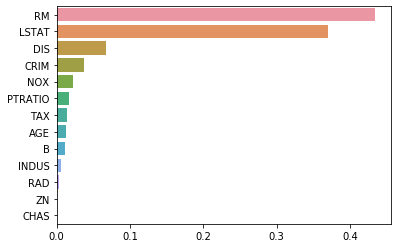

In [11]:
import seaborn as sns # 시각화 패키지
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000) # 랜덤포레스트회귀 클래스 호출

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_data, y_target) # 학습

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns) # 피처 중요도
feature_series = feature_series.sort_values(ascending=False) # 중요도 높은순부터 정렬
sns.barplot(x= feature_series, y=feature_series.index) # 막대그래프 출력

(100, 2)


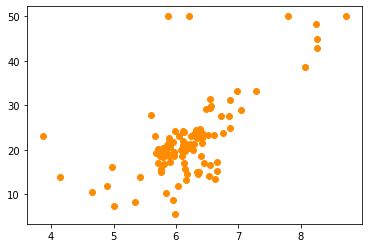

In [12]:
import matplotlib.pyplot as plt # 시각화 패키지
%matplotlib inline

bostonDF_sample = bostonDF[['RM','PRICE']] # x축: RM 독립변수, y축: PRICE 종속변수
bostonDF_sample = bostonDF_sample.sample(n=100,random_state=0) # 전체 row 중 100만 샘플 추출
print(bostonDF_sample.shape) # 추출된 데이터프레임의 행열 사이즈 확인
plt.figure() # 그림 출력
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange") # 점 그래프로 출력

In [13]:
import numpy as np # 그룹 연산 넘파이 
from sklearn.linear_model import LinearRegression # 선형회귀모델

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression() # 선형회귀 클래스 호출
rf_reg2 = DecisionTreeRegressor(max_depth=2) # 의사결정나무 회귀 클래스 호출, 나무 최대깊이 2
rf_reg7 = DecisionTreeRegressor(max_depth=7) # 의사결정나무 회귀 클래스 호출, 나무 최대깊이 7

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1) # 4.5에서 8.5 사이 0.04 단위로 1열로 추출한 것 100개를 변수에 지정

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)  #샘플 추출한 데이터중 RM 데이터를 100x1로 재구조
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1) #샘플 추출한 데이터중 PRICE 를 100x1로 재구조

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target) # 선형회귀 학습
rf_reg2.fit(X_feature, y_target) # 의사결정나무 회귀 깊이 2 학습
rf_reg7.fit(X_feature, y_target) # 의사결정나무 회귀 깊이 7 학습

pred_lr = lr_reg.predict(X_test) # 선형회귀 종속변수 예측
pred_rf2 = rf_reg2.predict(X_test) # 의사결정나무 회귀 깊이 2 종속변수 예측
pred_rf7 = rf_reg7.predict(X_test) # 의사결정나무 회귀 깊이 7 종속변수 예측


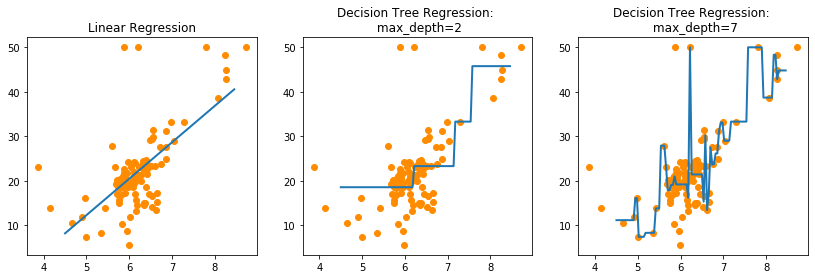

In [14]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3) # 1행x3열의 서브그래프들 출력

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression') # 1행x1열 그래프 제목
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange") # 1행 x 1열의 점 그래프
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 ) # 1행 x 1열의 선 그래프, 선형회귀 기반

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2') # 1행 2열 그래프 제목
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange") # 1행 2열 점 그래프
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 ) # 1행 2열 선 그래프, 의사결정나무 2층 기반

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7') # 1행 3열 그래프 제목
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange") # 1행 3열 점 그래프
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2) # 1행 3열 선 그래므, 의사결정나무 7층 기반

### ___________________________________________

### 실습 3. 토요타 코롤라 가격 분석 (3 hour)

#### 3.1 파일불러오기. datasets_286921_589826_ToyotaCorolla.csv

In [15]:
toyota = pd.read_csv('C:\data/datasets_286921_589826_ToyotaCorolla.csv')

#### 3.2 데이터 전처리

In [16]:
toyota.head()

Price  Age     KM FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986   Diesel  90         1          0  2000      3    1165
1  13750   23  72937   Diesel  90         1          0  2000      3    1165
2  13950   24  41711   Diesel  90         1          0  2000      3    1165
3  14950   26  48000   Diesel  90         0          0  2000      3    1165
4  13750   30  38500   Diesel  90         0          0  2000      3    1170

In [17]:
toyota.FuelType.value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: FuelType, dtype: int64

##### 3.2.1 결측치 제거

In [18]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   FuelType   1436 non-null   object
 4   HP         1436 non-null   int64 
 5   MetColor   1436 non-null   int64 
 6   Automatic  1436 non-null   int64 
 7   CC         1436 non-null   int64 
 8   Doors      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [19]:
toyota.corr()

Price       Age        KM        HP  MetColor  Automatic  \
Price      1.000000 -0.876590 -0.569960  0.314990  0.108905   0.033081   
Age       -0.876590  1.000000  0.505672 -0.156622 -0.108150   0.031717   
KM        -0.569960  0.505672  1.000000 -0.333538 -0.080503  -0.081854   
HP         0.314990 -0.156622 -0.333538  1.000000  0.058712   0.013144   
MetColor   0.108905 -0.108150 -0.080503  0.058712  1.000000  -0.019335   
Automatic  0.033081  0.031717 -0.081854  0.013144 -0.019335   1.000000   
CC         0.165067 -0.133182  0.302150  0.050884  0.034921  -0.069321   
Doors      0.185326 -0.148359 -0.036197  0.092424  0.085243  -0.027654   
Weight     0.581198 -0.470253 -0.028598  0.089614  0.057929   0.057249   

                 CC     Doors    Weight  
Price      0.165067  0.185326  0.581198  
Age       -0.133182 -0.148359 -0.470253  
KM         0.302150 -0.036197 -0.028598  
HP         0.050884  0.092424  0.089614  
MetColor   0.034921  0.085243  0.057929  
Automatic -0.069321 -0.027654  0.057249  
CC         1.000000  0.126768  0.651450  
Doors      0.126768  1.000000  0.302618  
Weight     0.651450  0.302618  1.000000

##### 3.2.2 Label encoding or One-hot encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행

encoder = LabelEncoder()
encoder.fit(toyota['FuelType'])
labels=encoder.transform(toyota['FuelType'])

print('인코딩 변환값:', labels)
# 인코딩 변환값: [0 1 4 5 3 3 2 2]

print('인코딩 클래스:' , encoder.classes_)
# 인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터’]

#print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))
# 디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']\

toyota['FuelType'] = labels

인코딩 변환값: [1 1 1 ... 2 2 2]
인코딩 클래스: ['CNG' 'Diesel' 'Petrol']


In [21]:
toyota.head()

Price  Age     KM  FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986         1  90         1          0  2000      3    1165
1  13750   23  72937         1  90         1          0  2000      3    1165
2  13950   24  41711         1  90         1          0  2000      3    1165
3  14950   26  48000         1  90         0          0  2000      3    1165
4  13750   30  38500         1  90         0          0  2000      3    1170

##### 3.2.3 Feature scaling, Normalization or Standardization or other

In [22]:
toyota_data = toyota
toyota_df = pd.DataFrame(data = toyota, columns = toyota.columns)


In [23]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(toyota)
toyota = scaler.transform(toyota)

In [24]:
toyota_df.head()

Price  Age     KM  FuelType  HP  MetColor  Automatic    CC  Doors  Weight
0  13500   23  46986         1  90         1          0  2000      3    1165
1  13750   23  72937         1  90         1          0  2000      3    1165
2  13950   24  41711         1  90         1          0  2000      3    1165
3  14950   26  48000         1  90         0          0  2000      3    1165
4  13750   30  38500         1  90         0          0  2000      3    1170

#### 3.3. 탐색적 데이터 분석 및 시각화

In [25]:
import seaborn as sns

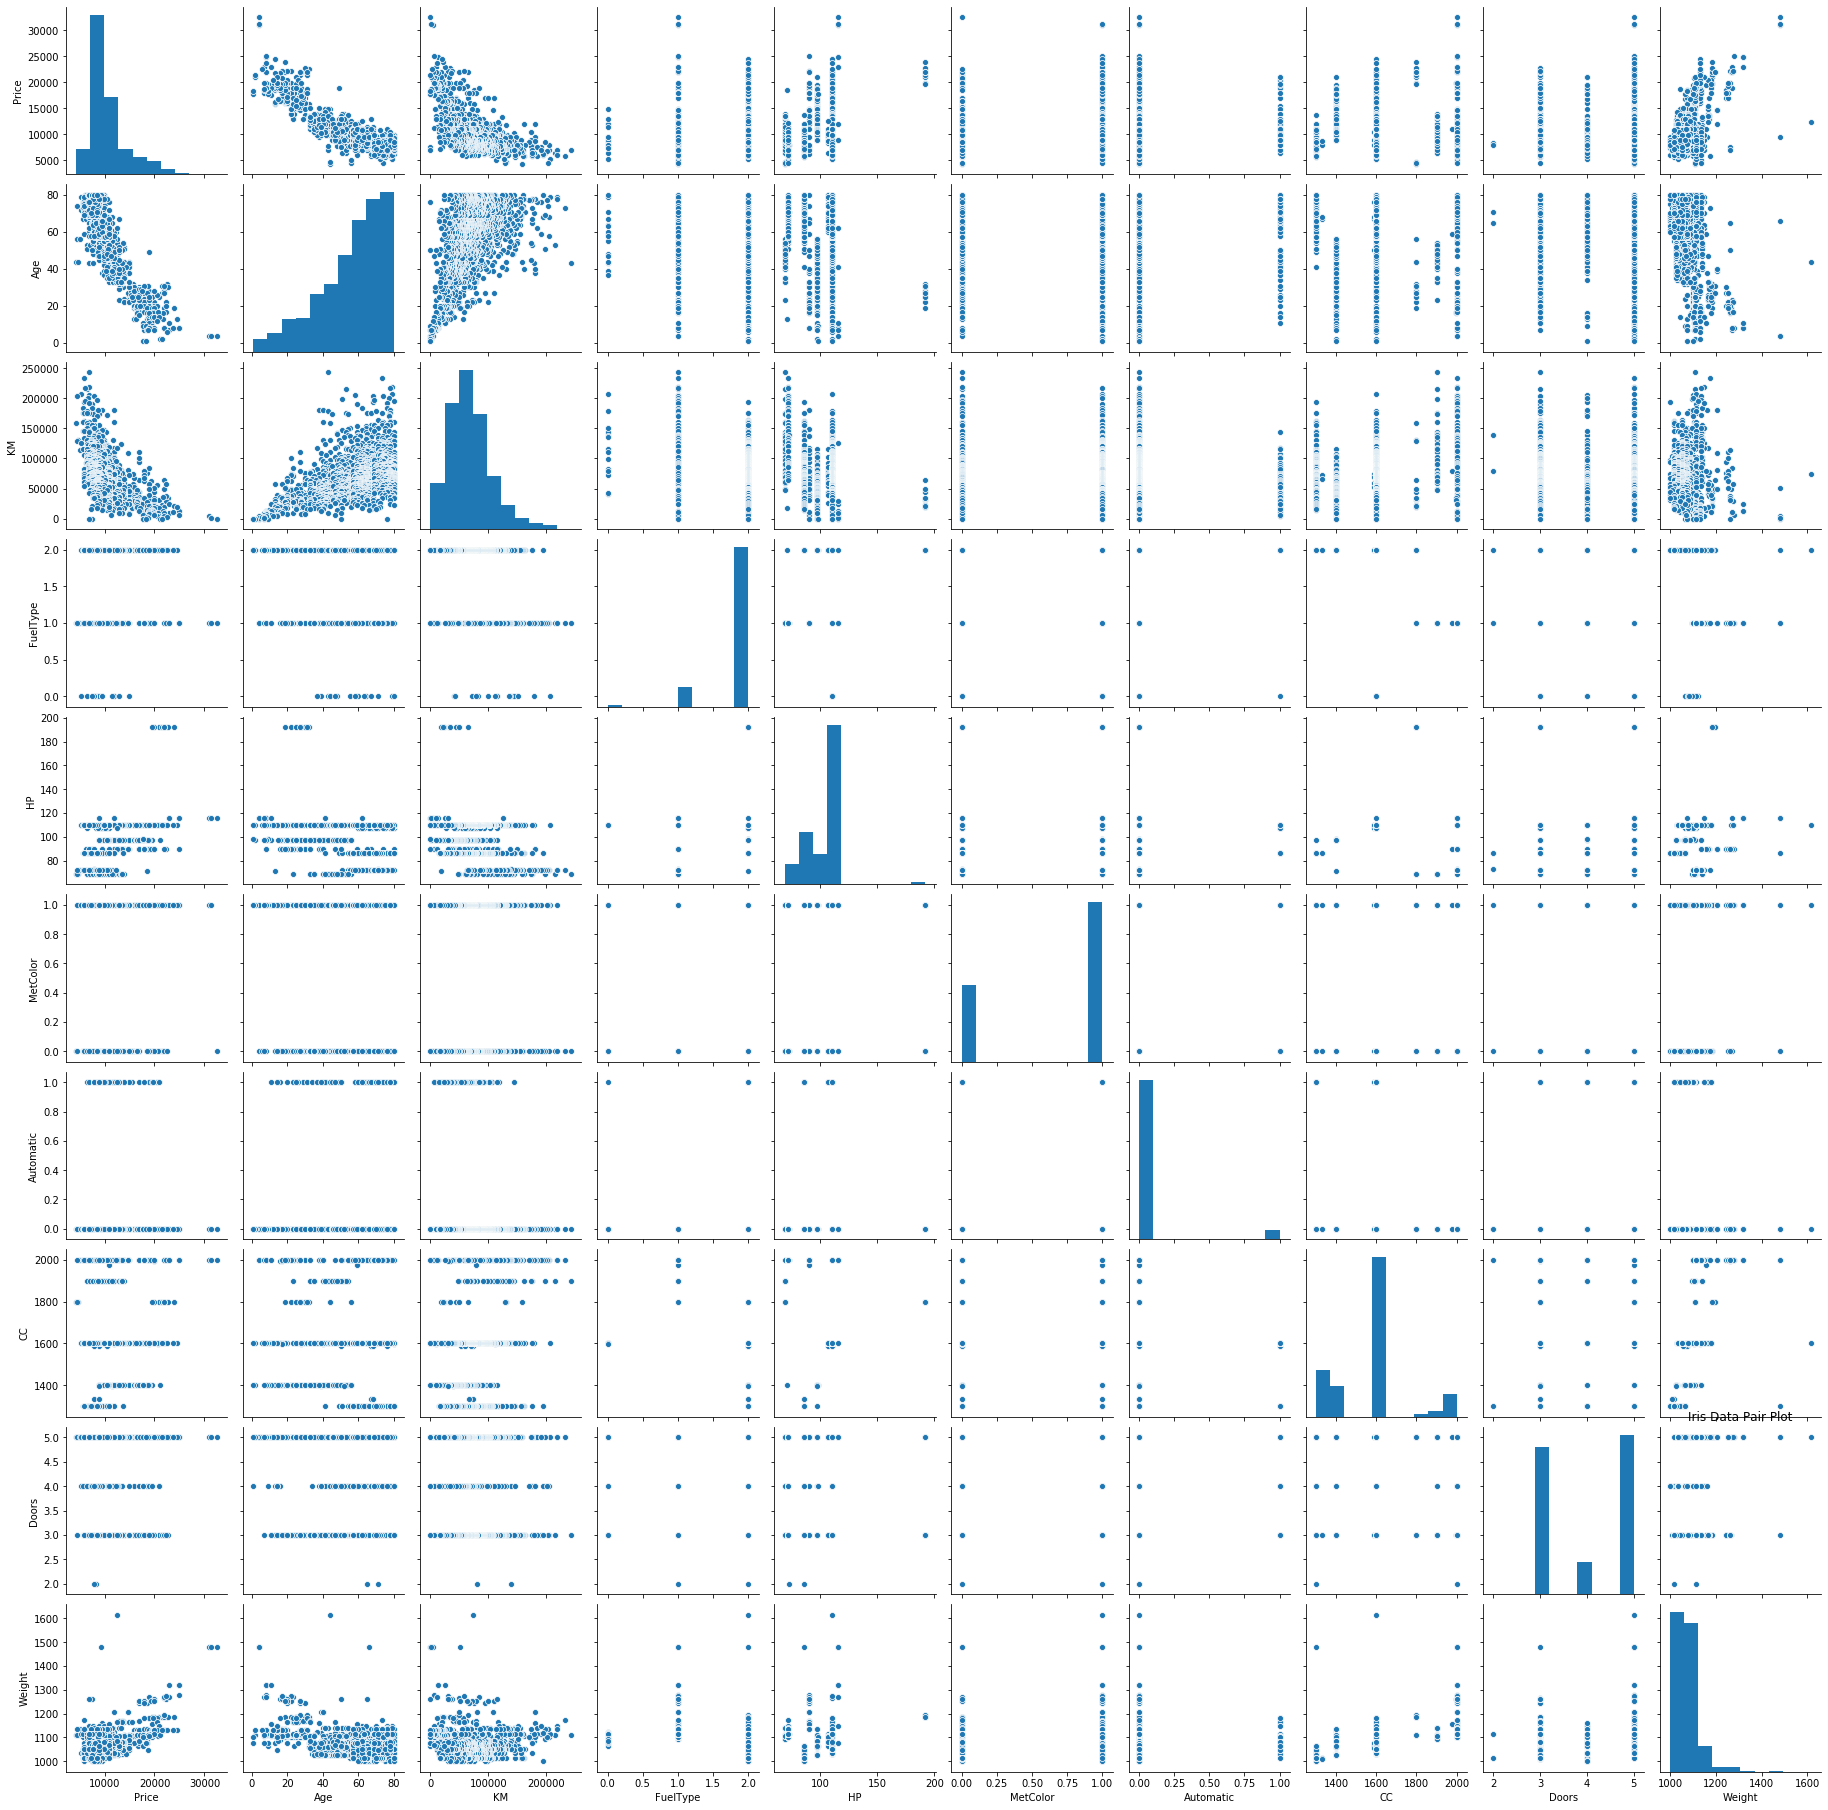

In [26]:
sns.pairplot(toyota_df)
plt.title("Iris Data Pair Plot")
plt.show()

#### 3.4 머신러닝 모델 - Decision Tree Regression, RandomforestRegressor, Gradient Boosting, XGBoost, LightGBM regressor

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [28]:
y = toyota_df['Price']
x = toyota_df.drop(['Price'], axis = 1)

In [29]:
dt_clf = DecisionTreeClassifier(random_state=156)

In [30]:
X_train , X_test , y_train , y_test = train_test_split(x, y,
                                                       test_size=0.2,  random_state=11)

In [31]:
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [32]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )                                                   

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred))) # 정답값과 얘측값을 같이 넣어준다.

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.0799
LogisticRegression 정확도: 0.0799
KNeighborsClassifier 정확도: 0.0417


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환


# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.0868


In [39]:
import time

start_time = time.time()

gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

NameError: name 'gb_clf' is not defined

#### 3.5 Cross validation scores for all ml model

#### 3.6 parameter tuning and minium RMSE score 공유

### ________________